# Regresión Logística


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Datos (_digits dataset_)


In [4]:
X, y = datasets.load_digits(return_X_y=True)

Counter(y)

Counter({3: 183,
         1: 182,
         5: 182,
         4: 181,
         6: 181,
         9: 180,
         7: 179,
         0: 178,
         2: 177,
         8: 174})

## División de los datos en entrenamiento y validación


In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=0.8, random_state=0)

display(Counter(y_train), Counter(y_val))
display(X_train.shape, X_val.shape)
display(y_train.shape, y_val.shape)

Counter({3: 154,
         4: 151,
         0: 151,
         1: 147,
         5: 142,
         2: 141,
         7: 140,
         9: 139,
         6: 137,
         8: 135})

Counter({6: 44, 9: 41, 5: 40, 8: 39, 7: 39, 2: 36, 1: 35, 4: 30, 3: 29, 0: 27})

(1437, 64)

(360, 64)

(1437,)

(360,)

## Entrenamiento del modelo


In [37]:
model = LogisticRegression(max_iter=1_000, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

## Evaluación del modelo


In [38]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"Train accuracy: {train_acc:.2f}")
print(f"Validation accuracy: {val_acc:.2f}")

Train accuracy: 1.00
Validation accuracy: 0.97


## Ejemplo de predicción


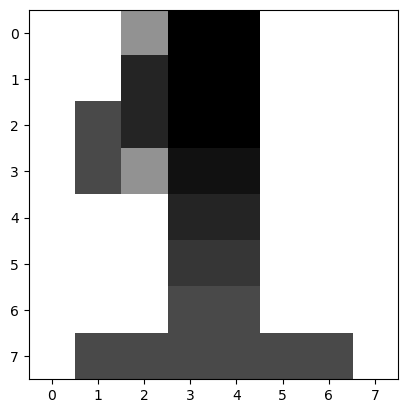

In [63]:
x = np.array([[0.,  0.,  6.,  14., 14.,  0.,  0.,  0.],
              [0.,  0.,  12.,  14., 14.,  0.,  0.,  0.],
              [0.,  10.,  12.,  14., 14.,  0.,  0.,  0.],
              [0.,  10.,  6.,  13., 13.,  0.,  0.,  0.],
              [0.,  0.,  0.,  12., 12.,  0.,  0.,  0.],
              [0.,  0.,  0.,  11., 11.,  0.,  0.,  0.],
              [0.,  0.,  0.,  10., 10.,  0.,  0.,  0.],
              [0.,  10.,  10.,  10., 10.,  10.,  10.,  0.]])

plt.imshow(x, cmap='gray_r')
plt.show()

x = x.ravel()

Predicted class: 1
Predicted probabilities: [[6.00241268e-10 9.77222664e-01 1.52783798e-02 7.67927907e-06
  8.38807385e-05 5.49808429e-03 5.25856358e-08 8.97714137e-07
  1.67999171e-03 2.28369086e-04]]


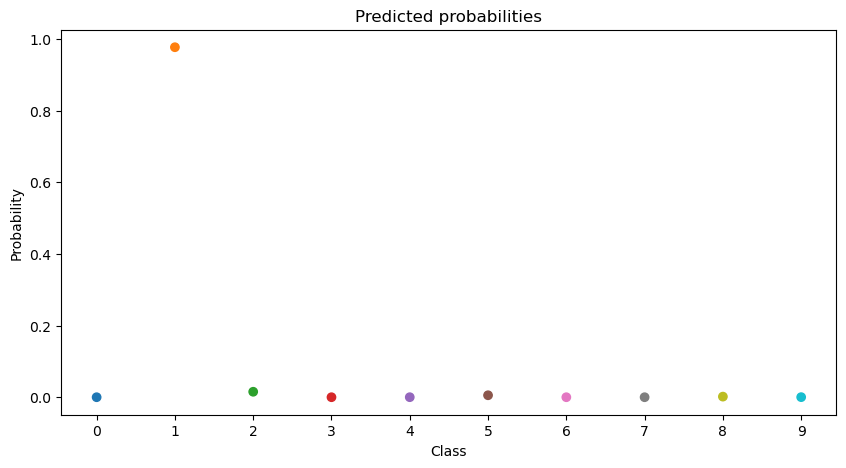

In [64]:
print(f"Predicted class: {model.predict([x])[0]}")
print(f"Predicted probabilities: {model.predict_proba([x])}")

# Plot predicted probabilities
plt.figure(figsize=(10, 5))
plt.scatter(range(10), model.predict_proba([x])[
            0], c=model.classes_, cmap='tab10')
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Predicted probabilities")
plt.show()